In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [504]:
## loading data in the dataframe "companies" ,"rounds2"


#companies = pd.read_csv('companies.csv' ,encoding= 'latin1')
rounds2 = pd.read_csv('rounds2.csv', encoding= 'latin1')

In [505]:
rounds2.head()
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [506]:
rounds2.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [507]:
rounds2.head()
rounds2.tail()
len(rounds2.company_permalink.unique())

90247

In [508]:
rounds2.company_permalink.value_counts()

/ORGANIZATION/SOLARFLARE                  10
/organization/semprius                     9
/ORGANIZATION/ENDOGASTRIC-SOLUTIONS        9
/organization/vocalocity                   9
/organization/solarflare                   9
                                          ..
/ORGANIZATION/GETJOB                       1
/ORGANIZATION/AT-INTERNET                  1
/ORGANIZATION/NEARABLE-TECHNOLOGY-CORP     1
/organization/kahoots-app                  1
/ORGANIZATION/CHARMING-CHARLIE             1
Name: company_permalink, Length: 90247, dtype: int64

In [509]:
# remove some  unicharactors from "company_permalink" columns 
 

rounds2.company_permalink = rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', errors ='ignore'))

rounds2.funding_round_permalink=rounds2[['funding_round_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

rounds2.loc[rounds2.company_permalink=='/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [510]:
len(rounds2.company_permalink.unique())

90247

In [511]:
rounds2.company_permalink.value_counts()

/ORGANIZATION/SOLARFLARE            10
/ORGANIZATION/SEMPRIUS               9
/organization/vocalocity             9
/organization/exagen-diagnostics     9
/ORGANIZATION/QUELLAN                9
                                    ..
/organization/glints                 1
/organization/laundrymax             1
/ORGANIZATION/GETJOB                 1
/ORGANIZATION/AT-INTERNET            1
/ORGANIZATION/CHARMING-CHARLIE       1
Name: company_permalink, Length: 90247, dtype: int64

In [512]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [513]:
rounds2.company_permalink.isnull().sum()

0

In [514]:
rounds2.company_permalink.duplicated().sum()

24702

In [515]:
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : x.lower())

#### how many duplicate values are there in rounds2?

In [516]:
rounds2.company_permalink.duplicated().sum()

48581

In [517]:
rounds2.head()
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


#### Question 1: How many unique companies are present in rounds2? : 66370

In [518]:
len(rounds2.company_permalink.unique())

66368

In [519]:
rounds2.shape

(114949, 6)

In [520]:
##rounds2[rounds2.company_permalink.unique()]

### Loading the companies dataset

In [521]:
companies = pd.read_csv('companies.csv' ,encoding= 'latin1')

In [522]:
companies.head()
#companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [523]:
#companies.permalink = companies[['permalink']].applymap(lambda x : x.encode('utf-8','ignore').decode('ascii', 'ignore'))
companies.name = companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

companies.name = companies.name.str.replace(r'\W',"")

In [524]:
### checking the permalink and name as lower letters

companies.permalink = companies.permalink.map(lambda x: x.lower())
companies['name']=companies['name'].str.lower()

In [525]:
companies.loc[companies['permalink']=='/organization/tell-it-in',['name']]=' '.join(companies[companies['permalink']=='/organization/tell-it-in']['permalink'].str.split('/').tolist()[0][2].split('-'))

In [526]:
companies.permalink.value_counts

<bound method IndexOpsMixin.value_counts of 0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                 /organization/ãeron
66366                               /organization/ãasys-2
66367    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: permalink, Length: 66368, dtype: object>

In [527]:
## We can see the Name Attribute has some invalid data in it 


#companies.loc[(companies.name == '#NAME?')] = companies.name.replace('#NAME?', '')

companies.loc[(companies.name == '#name?')] 

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [528]:
companies.loc[57774] 

permalink        /organization/themoment
name                                name
homepage_url                         NaN
category_list                    Trading
status                         operating
country_code                         USA
state_code                            CA
region                       SF Bay Area
city                           San Mateo
founded_at                    01-01-1999
Name: 57774, dtype: object

In [529]:
companies.shape

(66368, 10)

In [530]:
## solution is to Fill the Name attribute with the appropriate values  

a = companies['permalink'].apply(lambda x:x.split('/')[-1])
companies.name.loc[[4737,5662,42570,57774]] = a[[4737,5662,42570,57774]]


## alternate way to replacing the #name?

#ser = companies.loc[companies['name']=='#name?','permalink'].apply(lambda x:x.split('/')[-1])

#for index in ser.items():
#    companies.loc[index[0],'name'] = ser[index[0]]

In [531]:
## cross-check 

print(companies.name.loc[[4737,5662,42570,57774]])

companies.loc[(companies.name == '#name?')] 

4737                atfutsal
5662                  backup
42570    pay-mobile-checkout
57774              themoment
Name: name, dtype: object


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [532]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,theoneoftheminc,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,06com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,zznodescienceandtechnology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,zzzzappwirelessltd,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/ãeron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


#### Question 2:How many unique companies are present in the companies file? : 65961

In [533]:
len(companies.name.unique())

65961

In [534]:
## need remove the duplicate values 
## Code is not working good need to revisit the code as of now we are proceeding with duplicate values 

##companies = companies[~companies.name.duplicated()]

#### Question 3: In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column. : name 

In [535]:
## name : will be the unique column as we can see the below output says we have duplicate entry 

companies[(companies.name=='3divaz')]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
281,/organization/3divaz-2,3divaz,http://www.3divaz.ch/Home,NaN,closed,NaN,NaN,NaN,NaN,01-07-2014
282,/organization/3divaz-3,3divaz,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014


#### Question4: Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.: N

In [536]:

rounds2.company_permalink.isin(companies.permalink).sum()



114875

#### Question 5: Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in 

In [537]:
master_frame = pd.merge(rounds2,companies , left_on='company_permalink', right_on="permalink" , how= 'left')

#master_frame = rounds2.merge(companies[['id','company_permalink']], how=left_on,right_on='permalink')

In [538]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,theoneoftheminc,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,06com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,zzzzappwirelessltd,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,zzzzappwirelessltd,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checkpoint 2: Funding Type Analysis

In [539]:
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [540]:
# Converting the amounts of 'raised_amount_usd' column from $ to million $ for better calculation and understandability.

master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].apply(lambda usd: round(usd/1000000,2))

# Renaming the column to million for better understanding 

master_frame=master_frame.rename(columns = {'raised_amount_usd':'raised_amount_usd_mil'})

In [541]:
#master_frame.raised_amount_usd_mil.groupby(master_frame.funding_round_type.value_counts([0])).mean()

In [542]:
## check the status 

master_frame.status.value_counts()


operating    90097
acquired     11744
closed        8708
ipo           4326
Name: status, dtype: int64

#### Note: Since 'closed' sector not in concern hence we can get rid of it 

In [543]:
master_frame = master_frame[~(master_frame.status == 'closed')]

## cross check 

master_frame.status.value_counts()

operating    90097
acquired     11744
ipo           4326
Name: status, dtype: int64

In [544]:
### how many percentage null values are present in all the columns

round((master_frame.isnull().sum()/len(master_frame.index))*100,2)


company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.74
funded_at                   0.00
raised_amount_usd_mil      17.25
permalink                   0.07
name                        0.07
homepage_url                5.07
category_list               2.30
status                      0.07
country_code                6.47
state_code                  8.45
region                      7.76
city                        7.76
founded_at                 16.84
dtype: float64

In [545]:
## Dropping the column having more the 60% null values or those which is not making sence at this moment for the analisys

master_frame = master_frame.drop(['funding_round_code', 'homepage_url','founded_at', 'state_code', 'region','city'] , axis=1)

master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd_mil,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00,/organization/-fame,fame,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,/organization/-qounter,qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.70,/organization/-qounter,qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.41,/organization/-the-one-of-them-inc-,theoneoftheminc,Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.00,/organization/0-6-com,06com,Curated Web,operating,CHN


In [546]:
master_frame.raised_amount_usd_mil.isnull().sum()

#master_frame.isna().sum()


18327

#### average values of investment of all funding type 

In [547]:
master_frame.raised_amount_usd_mil.describe()

round((master_frame.isnull().sum()/len(master_frame.index))*100,2)


company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd_mil      17.25
permalink                   0.07
name                        0.07
category_list               2.30
status                      0.07
country_code                6.47
dtype: float64

In [548]:
### since there is null values in the country code we can get rid of it 

master_frame = master_frame.loc[~(master_frame.country_code.isnull())]



#Biotechnology : fill the null values with most frequent category

#master_frame.category_list.fillna(master_frame['category_list'].mode()[0])

master_frame['category_list'] = master_frame['category_list'].fillna(master_frame['category_list'].mode()[0])

In [549]:
## removing the null values in 'raised_amount_usd_mil' to get the efficient values 

master_frame = master_frame[~(master_frame['raised_amount_usd_mil'].isnull())]

round(master_frame.groupby('funding_round_type')['raised_amount_usd_mil'].median(),2)

funding_round_type
angel                     0.41
convertible_note          0.30
debt_financing            1.10
equity_crowdfunding       0.08
grant                     0.25
non_equity_assistance     0.06
post_ipo_debt            20.00
post_ipo_equity          12.00
private_equity           21.00
product_crowdfunding      0.23
secondary_market         60.00
seed                      0.31
undisclosed               1.05
venture                   5.00
Name: raised_amount_usd_mil, dtype: float64

#### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [550]:
### we can see Venture could be the best choice as per the investment range 

master_frame.groupby('funding_round_type')['raised_amount_usd_mil'].median().between(5, 15)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity           True
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd_mil, dtype: bool

In [551]:
master_frame.shape

(83257, 10)

### Checkpoint 3: Country Analysis

#### Note:  since we have choosen the venture type fund is best suitable for this spark Fund ,hence will get rid of every other funding_type

In [552]:
# make a copy of the dataframe for venture segment dataset

master_frame_venture = master_frame

master_frame_venture = master_frame_venture[master_frame_venture['funding_round_type'] == 'venture']

In [553]:
### we don't need funding_round_permalink as of now 

master_frame_venture = master_frame_venture.drop(['funding_round_permalink'],axis=1)

In [554]:
master_frame_venture.shape

(44944, 9)

In [555]:
master_frame_venture.isna().sum()

company_permalink        0
funding_round_type       0
funded_at                0
raised_amount_usd_mil    0
permalink                0
name                     0
category_list            0
status                   0
country_code             0
dtype: int64

#### Removing the null values from the country_code to get the better result 

In [556]:
master_frame_venture = master_frame_venture[~master_frame_venture.country_code.isna()]

In [557]:
print('shape :', master_frame_venture.shape)

master_frame_venture.isna().sum()

shape : (44944, 9)


company_permalink        0
funding_round_type       0
funded_at                0
raised_amount_usd_mil    0
permalink                0
name                     0
category_list            0
status                   0
country_code             0
dtype: int64

In [558]:
len(master_frame_venture.name.unique())

25477

In [559]:
## round(master_frame_venture.loc[master_frame_venture['funding_round_type']  == 'venture'].count()/len(master_frame_venture.index)*100,2)

In [560]:
master_frame_venture

,company_permalink,funding_round_type,funded_at,raised_amount_usd_mil,permalink,name,category_list,status,country_code
0,/organization/-fame,venture,05-01-2015,10.00,/organization/-fame,fame,Media,operating,IND
4,/organization/0-6-com,venture,19-03-2008,2.00,/organization/0-6-com,06com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,venture,21-12-2009,0.72,/organization/0ndine-biomedical-inc,ondinebiomedicalinc,Biotechnology,operating,CAN
10,/organization/0xdata,venture,09-11-2015,20.00,/organization/0xdata,h2oai,Analytics,operating,USA
11,/organization/0xdata,venture,03-01-2013,1.70,/organization/0xdata,h2oai,Analytics,operating,USA
...,...,...,...,...,...,...,...,...,...
114923,/organization/zyomyx-inc,venture,29-01-2010,0.56,/organization/zyomyx-inc,zyomyx,Biotechnology,operating,USA
114934,/organization/zyrra,venture,18-10-2012,0.14,/organization/zyrra,zyrra,E-Commerce,operating,USA
114936,/organization/zystor,venture,16-12-2004,8.50,/organization/zystor,zystor,Biotechnology,acquired,USA
114937,/organization/zytoprotec,venture,29-01-2013,2.69,/organization/zytoprotec,zytoprotec,Biotechnology,operating,AUT


#### Analysing the Top 3 English-Speaking Countries

In [561]:
master_frame_venture.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd_mil,permalink,name,category_list,status,country_code
0,/organization/-fame,venture,05-01-2015,10.00,/organization/-fame,fame,Media,operating,IND
4,/organization/0-6-com,venture,19-03-2008,2.00,/organization/0-6-com,06com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,venture,21-12-2009,0.72,/organization/0ndine-biomedical-inc,ondinebiomedicalinc,Biotechnology,operating,CAN
10,/organization/0xdata,venture,09-11-2015,20.00,/organization/0xdata,h2oai,Analytics,operating,USA
11,/organization/0xdata,venture,03-01-2013,1.70,/organization/0xdata,h2oai,Analytics,operating,USA


In [562]:
round((master_frame_venture.isnull().sum()/len(master_frame_venture.index))*100,2)

company_permalink        0.0
funding_round_type       0.0
funded_at                0.0
raised_amount_usd_mil    0.0
permalink                0.0
name                     0.0
category_list            0.0
status                   0.0
country_code             0.0
dtype: float64

In [563]:
### need to revisit the code 

## master_frame_venture['funding_round_code'].value_counts()

In [564]:
##master_frame = master_frame.drop('funding_round_code', axis=1)

In [565]:
top9 = master_frame_venture.groupby(['country_code']).sum().sort_values(by = 'raised_amount_usd_mil', ascending = False).head(10)

In [566]:
top9['country_code'] = top9.index



#### Question 1: Top English speaking country

In [567]:
top9['top_pos'] = range(1,11)
top9.set_index('top_pos').nlargest(4, 'raised_amount_usd_mil')

,raised_amount_usd_mil,country_code
top_pos,,
1,399935.24,USA
2,39101.68,CHN
3,18241.30,GBR
4,14050.62,IND


In [568]:
top3 = top9.nlargest(4, 'raised_amount_usd_mil')

top3 = top3[~(top3['country_code'] == 'CHN')]

top3

,raised_amount_usd_mil,country_code,top_pos
country_code,,,
USA,399935.24,USA,1
GBR,18241.30,GBR,3
IND,14050.62,IND,4


####  
 1. Top English-speaking country   : USA
 2. Second English-speaking country  : GBR
 3. Third English-speaking country   : IND

In [569]:
#alternate way to find tho three english speaking country 

#top9[top9 <=4]

### Checkpoint 4: Sector Analysis 1

In [570]:
mapping= pd.read_csv('mapping.csv')

In [571]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [572]:
mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [573]:
mapping.loc[mapping.category_list.isna()]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0


In [574]:
mapping.category_list.value_counts()

## as we can see there is no any most frequent catagory which we can impute in place of NA value

Young Adults              1
Public Safety             1
Ticketing                 1
Industrial                1
Social Media Ma0gement    1
                         ..
Point of Sale             1
Dental                    1
Content Delivery          1
Hospitality               1
Incentives                1
Name: category_list, Length: 687, dtype: int64

In [575]:
## as we can see there is not any common value among the catagory_list hence i'll drop the null value 

mapping = mapping.loc[~mapping.category_list.isnull()]

In [576]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        687 non-null int64
Blanks                                     687 non-null int64
Cleantech / Semiconductors                 687 non-null int64
Entertainment                              687 non-null int64
Health                                     687 non-null int64
Manufacturing                              687 non-null int64
News, Search and Messaging                 687 non-null int64
Others                                     687 non-null int64
Social, Finance, Analytics, Advertising    687 non-null int64
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


In [577]:
mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,687.000000,687.0,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,0.032023,0.0,0.077147,0.129549,0.091703,0.058224,0.104803,0.283843,0.222707
std,0.176190,0.0,0.267019,0.336051,0.288817,0.234337,0.306523,0.451190,0.416367
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [578]:
## Segmenting the category_list in mapping dataset

cata_segment = mapping.groupby('category_list')

In [579]:
cata_segment.mean()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,,
0notechnology,0,0,1,0,0,0,0,0,0
0tural Language Processing,0,0,1,0,0,0,0,0,0
0tural Resources,0,0,1,0,0,0,0,0,0
0vigation,0,0,0,0,0,0,1,0,0
3D,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
Young Adults,0,0,0,0,0,0,0,1,0
iOS,0,0,0,0,0,0,0,1,0
iPad,0,0,0,0,0,0,0,1,0


In [580]:
mapping.category_list.value_counts

<bound method IndexOpsMixin.value_counts of 1                    3D
2           3D Printing
3         3D Technology
4            Accounting
5      Active Lifestyle
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 687, dtype: object>

In [581]:
master_frame_venture.category_list.unique()

array(['Media', 'Curated Web', 'Biotechnology', ...,
       'Crowdsourcing|Knowledge Management',
       'Cloud Computing|Enterprise 2.0|Enterprise Software|MicroBlogging|Social Business',
       'Facebook Applications|Games|Networking|Technology'], dtype=object)

### Imp Notes for own ref

#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

IMP note: 
The handling of the n keyword depends on the number of found splits:

If found splits > n, make first n splits only

If found splits <= n, make all splits

If for a certain row the number of found splits < n, append None for padding up to n if expand=True

If using expand=True, Series and Index callers return DataFrame and MultiIndex objects, respectively.


In [582]:
a = master_frame_venture['category_list'].str.split('|',expand=True)

In [583]:
a[0]

0                       Media
4                 Curated Web
8               Biotechnology
10                  Analytics
11                  Analytics
                 ...         
114923          Biotechnology
114934             E-Commerce
114936          Biotechnology
114937          Biotechnology
114941    Enterprise Software
Name: 0, Length: 44944, dtype: object

In [584]:
master_frame_venture.columns

Index(['company_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd_mil', 'permalink', 'name', 'category_list', 'status',
       'country_code'],
      dtype='object')

In [585]:
master_frame_venture['primary sector'] = a[0]

In [586]:
mapping['category_list'].value_counts().head(40)

Young Adults                    1
Public Safety                   1
Ticketing                       1
Industrial                      1
Social Media Ma0gement          1
Intelligent Systems             1
Insurance                       1
Farmers Market                  1
Commercial Real Estate          1
SEO                             1
Music Services                  1
Electronics                     1
Social Media                    1
Service Providers               1
Sales Automation                1
Apps                            1
Women                           1
Travel & Tourism                1
Agriculture                     1
Media                           1
Broadcasting                    1
Video Conferencing              1
Optical Communications          1
Software                        1
Textiles                        1
Funeral Industry                1
Babies                          1
Algorithms                      1
Business Information Systems    1
Online Gaming 

In [587]:
### the new name has '0' as letter , we will change it to 'na' which will make sence 

mapping.category_list = mapping['category_list'].str.replace('0','na')

C:\Users\Prakash Singh\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [588]:
mapping.category_list.values

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bank

In [589]:


print(mapping.columns)

## we don't need 'Blanks' column as this is not comes under 8 main sector as per metadata of the dataset

### dropping the 'Blank' column

mapping = mapping.drop(['Blanks'],axis=1)



Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')


In [590]:
mapping

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,1,0,0,0,0,0
685,Wireless,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,1,0


In [591]:
mapping.category_list.value_counts().head(30)

Young Adults               1
Music Services             1
Broadcasting               1
Ticketing                  1
Industrial                 1
Intelligent Systems        1
Insurance                  1
Farmers Market             1
Commercial Real Estate     1
SEO                        1
Document Management        1
3D Technology              1
Service Providers          1
Predictive Analytics       1
Apps                       1
Travel & Tourism           1
Agriculture                1
Innovation Management      1
Media                      1
Drones                     1
Video Conferencing         1
Optical Communications     1
Software                   1
Auto                       1
Augmented Reality          1
Mobile Commerce            1
Funeral Industry           1
Babies                     1
Supply Chain Management    1
Algorithms                 1
Name: category_list, dtype: int64

In [592]:
#### https://www.youtube.com/watch?v=oY62o-tBHF4


pri_mapped_main = pd.melt(mapping, id_vars=['category_list'], var_name='main_sector')


pri_mapped_main = pri_mapped_main.loc[pri_mapped_main['value'] == 1]

In [593]:
pri_mapped_main

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
5425,Social Recruiting,"Social, Finance, Analytics, Advertising",1
5426,Social Television,"Social, Finance, Analytics, Advertising",1
5427,Social Travel,"Social, Finance, Analytics, Advertising",1
5438,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [594]:
pri_mapped_main = pri_mapped_main.drop(['value'],axis=1)

In [595]:
pri_mapped_main = pri_mapped_main.rename(columns={'category_list' : 'primary sector'})

In [596]:
### https://www.geeksforgeeks.org/python-pandas-series-reset_index/#:~:text=reset_index()%20function%20generate%20a,be%20used%20as%20a%20column.&text=drop%20%3A%20Just%20reset%20the%20index,column%20in%20the%20new%20DataFrame.

pri_mapped_main = pri_mapped_main.reset_index(drop = True)

In [597]:
pri_mapped_main

,primary sector,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports
...,...,...
682,Social Recruiting,"Social, Finance, Analytics, Advertising"
683,Social Television,"Social, Finance, Analytics, Advertising"
684,Social Travel,"Social, Finance, Analytics, Advertising"
685,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [598]:
### createing the master_funding_type dataframe with help of master_data_venture and pri_mapped_main

master_funding_type = pd.merge(master_frame_venture, pri_mapped_main , on='primary sector', how= 'inner')

In [599]:
master_funding_type.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          689
Cleantech / Semiconductors                  9473
Entertainment                               2520
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10679
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [600]:
master_funding_type.shape

(44768, 11)

In [601]:
### fetch the data raised_amout_usd from 5,15 million 

master_funding_type.loc[master_funding_type.raised_amount_usd_mil.between(5.0,15.0, inclusive=True)]

,company_permalink,funding_round_type,funded_at,raised_amount_usd_mil,permalink,name,category_list,status,country_code,primary sector,main_sector
0,/organization/-fame,venture,05-01-2015,10.00,/organization/-fame,fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,venture,06-10-2015,15.00,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,venture,07-05-2013,5.80,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
4,/organization/all-def-digital,venture,06-08-2014,5.00,/organization/all-def-digital,alldefdigital,Media,operating,USA,Media,Entertainment
14,/organization/chefs-feed,venture,26-02-2015,5.00,/organization/chefs-feed,chefsfeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
44755,/organization/user-interface,venture,24-01-2001,8.25,/organization/user-interface,userinterface,User Interface,operating,USA,User Interface,Others
44756,/organization/vector-watch,venture,25-11-2015,5.00,/organization/vector-watch,vectorwatch,Watch|Wearables,operating,GBR,Watch,Others
44757,/organization/washio,venture,09-06-2014,10.50,/organization/washio,washio,Service Industries,operating,USA,Service Industries,Others
44761,/organization/yapta,venture,20-07-2011,5.00,/organization/yapta,yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others


#### check point 5

In [602]:
### the range of funding preferred by Spark Funds is 5 to 15 million USD

master_funding_type_range = master_funding_type.loc[master_funding_type.raised_amount_usd_mil.between(5,15, inclusive=True)]

In [603]:
master_funding_type_range

,company_permalink,funding_round_type,funded_at,raised_amount_usd_mil,permalink,name,category_list,status,country_code,primary sector,main_sector
0,/organization/-fame,venture,05-01-2015,10.00,/organization/-fame,fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,venture,06-10-2015,15.00,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,venture,07-05-2013,5.80,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
4,/organization/all-def-digital,venture,06-08-2014,5.00,/organization/all-def-digital,alldefdigital,Media,operating,USA,Media,Entertainment
14,/organization/chefs-feed,venture,26-02-2015,5.00,/organization/chefs-feed,chefsfeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
44755,/organization/user-interface,venture,24-01-2001,8.25,/organization/user-interface,userinterface,User Interface,operating,USA,User Interface,Others
44756,/organization/vector-watch,venture,25-11-2015,5.00,/organization/vector-watch,vectorwatch,Watch|Wearables,operating,GBR,Watch,Others
44757,/organization/washio,venture,09-06-2014,10.50,/organization/washio,washio,Service Industries,operating,USA,Service Industries,Others
44761,/organization/yapta,venture,20-07-2011,5.00,/organization/yapta,yapta,Tracking|Transportation|Travel,operating,USA,Tracking,Others


In [604]:
##### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations 
#### of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

#### >> All the columns of the master_frame along with the primary sector and the main sector
#### >> 
#### >> The total number (or count) of investments for each main sector in a separate column
#### >> 
#### >> The total amount invested in each main sector in a separate column
#### >> 
#### >> Using the three data frames, you can calculate the total number and amount of investments in each main sector.

In [605]:
D1 = master_funding_type_range[master_funding_type_range.country_code == 'USA']


D1

,company_permalink,funding_round_type,funded_at,raised_amount_usd_mil,permalink,name,category_list,status,country_code,primary sector,main_sector
4,/organization/all-def-digital,venture,06-08-2014,5.00,/organization/all-def-digital,alldefdigital,Media,operating,USA,Media,Entertainment
14,/organization/chefs-feed,venture,26-02-2015,5.00,/organization/chefs-feed,chefsfeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Entertainment
20,/organization/huffingtonpost,venture,01-08-2006,5.00,/organization/huffingtonpost,thehuffingtonpost,Media|News|Publishing,acquired,USA,Media,Entertainment
21,/organization/huffingtonpost,venture,01-09-2007,5.00,/organization/huffingtonpost,thehuffingtonpost,Media|News|Publishing,acquired,USA,Media,Entertainment
30,/organization/mediabong,venture,13-05-2015,5.00,/organization/mediabong,mediabong,Media|Semantic Search|Video,operating,USA,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
44745,/organization/thredhq,venture,18-09-2013,5.00,/organization/thredhq,thredhq,Social + Mobile + Local|Social Network Media,operating,USA,Social + Mobile + Local,"Social, Finance, Analytics, Advertising"
44750,/organization/wizrocket-technologies,venture,03-08-2015,8.00,/organization/wizrocket-technologies,clevertap,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,Consumer Behavior,"Social, Finance, Analytics, Advertising"
44755,/organization/user-interface,venture,24-01-2001,8.25,/organization/user-interface,userinterface,User Interface,operating,USA,User Interface,Others
44757,/organization/washio,venture,09-06-2014,10.50,/organization/washio,washio,Service Industries,operating,USA,Service Industries,Others


In [606]:
D2 = master_funding_type_range[master_funding_type_range.country_code == 'GBR']

D2

,company_permalink,funding_round_type,funded_at,raised_amount_usd_mil,permalink,name,category_list,status,country_code,primary sector,main_sector
1,/organization/90min,venture,06-10-2015,15.00,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,venture,07-05-2013,5.80,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
119,/organization/azimo,venture,11-03-2014,10.00,/organization/azimo,azimo,Curated Web|Finance Technology|Financial Servi...,operating,GBR,Curated Web,"News, Search and Messaging"
130,/organization/basekit-platform,venture,13-05-2014,7.00,/organization/basekit-platform,basekit,Curated Web|Internet|Web Design,operating,GBR,Curated Web,"News, Search and Messaging"
131,/organization/basekit-platform,venture,03-02-2014,6.82,/organization/basekit-platform,basekit,Curated Web|Internet|Web Design,operating,GBR,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...
44507,/organization/lost-my-name,venture,25-06-2015,9.00,/organization/lost-my-name,lostmyname,Kids|Publishing,operating,GBR,Kids,Others
44523,/organization/perpetuum,venture,12-10-2007,10.18,/organization/perpetuum,perpetuum,Wireless,operating,GBR,Wireless,Entertainment
44712,/organization/yoyo,venture,15-04-2015,10.00,/organization/yoyo,yoyowallet,Loyalty Programs|Mobile|Mobile Payments|Retail,operating,GBR,Loyalty Programs,Others
44737,/organization/stingray-geophysical,venture,23-03-2006,11.46,/organization/stingray-geophysical,stingraygeophysical,Gas|Oil|Services,operating,GBR,Gas,Cleantech / Semiconductors


In [607]:
D3 = master_funding_type_range[master_funding_type_range.country_code == 'IND']

D3

,company_permalink,funding_round_type,funded_at,raised_amount_usd_mil,permalink,name,category_list,status,country_code,primary sector,main_sector
0,/organization/-fame,venture,05-01-2015,10.00,/organization/-fame,fame,Media,operating,IND,Media,Entertainment
121,/organization/babajob,venture,28-04-2015,10.00,/organization/babajob,babajob,Curated Web|Information Technology|Services|St...,operating,IND,Curated Web,"News, Search and Messaging"
143,/organization/bharat-matrimony,venture,05-02-2008,11.75,/organization/bharat-matrimony,bharatmatrimony,Curated Web|Match-Making,operating,IND,Curated Web,"News, Search and Messaging"
165,/organization/bluestone-com,venture,24-01-2012,5.00,/organization/bluestone-com,bluestonecom,Curated Web,operating,IND,Curated Web,"News, Search and Messaging"
167,/organization/bluestone-com,venture,18-03-2014,10.00,/organization/bluestone-com,bluestonecom,Curated Web,operating,IND,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...
44242,/organization/easylink,venture,13-04-2006,5.40,/organization/easylink,easylink,Web Design|Web Development|Web Hosting,ipo,IND,Web Design,"News, Search and Messaging"
44270,/organization/livspace,venture,11-08-2015,8.00,/organization/livspace,livspace,Interior Design,operating,IND,Interior Design,Entertainment
44316,/organization/razorpay,venture,27-10-2015,9.00,/organization/razorpay,razorpay,FinTech|Payments,operating,IND,FinTech,"Social, Finance, Analytics, Advertising"
44427,/organization/holidayiq-com,venture,20-07-2015,15.00,/organization/holidayiq-com,holidayiq,Resorts|Surveys|Travel,operating,IND,Resorts,Entertainment


#### Total number of Investments (count) 

In [608]:
#  print('Total number of investments : Country 1 : ' + str(len(D1)))
#  
#  print('Total number of investments : Country 2 : ' + str(len(D2)))
#  
#  print('Total number of investments : Country 3 : ' + str(len(D3)))

In [609]:
print('Total number of Investments (count) in USA : ' + str(D1.shape[0]))

print('Total amount of investment (USD mil) USA : ' + str(round(D1.raised_amount_usd_mil.sum(),3)) + str('$'))


Total number of Investments (count) in USA : 11328
Total amount of investment (USD mil) USA : 101397.05$


In [610]:
print('Total amount of investment (USD mil) USA : ' + str(round(D2.raised_amount_usd_mil.sum(),3)) + str('$'))
print('Total number of Investments (count) in GBR : ' + str(D2.shape[0]))

Total amount of investment (USD mil) USA : 5101.49$
Total number of Investments (count) in GBR : 587


In [611]:
print('Total amount of investment (USD mil) USA : ' + str(round(D3.raised_amount_usd_mil.sum(),3)) + str('$'))
print('Total number of Investments (count) in GBR : ' + str(D3.shape[0]))

Total amount of investment (USD mil) USA : 2847.68$
Total number of Investments (count) in GBR : 317


In [612]:
master_funding_type_range.isnull().sum()

company_permalink        0
funding_round_type       0
funded_at                0
raised_amount_usd_mil    0
permalink                0
name                     0
category_list            0
status                   0
country_code             0
primary sector           0
main_sector              0
dtype: int64

In [613]:
#sns.distplot(master_funding_type_range, bins =20)

#### Top Sector name (no. of investment-wise):  Others

In [614]:
D1_Top = D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]

D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     2766
Social, Finance, Analytics, Advertising    2594
Cleantech / Semiconductors                 2209
Name: main_sector, dtype: int64

In [615]:
D2_Top = D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     141
Social, Finance, Analytics, Advertising    128
Cleantech / Semiconductors                 120
Name: main_sector, dtype: int64

In [616]:
D3_Top = D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]

D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     103
Social, Finance, Analytics, Advertising     59
News, Search and Messaging                  49
Name: main_sector, dtype: int64

In [617]:
### https://www.geeksforgeeks.org/python-pandas-dataframe-assign/#:~:text=assign()%20method%20assign%20new,of%20rows%20in%20the%20dataframe.

### example :# increase the salary by 10 %  
## df.assign(Revised_Salary = lambda x: df['Salary'] 
###                               + df['Salary']/10) 


### take the refrence from below mentioned link to transform the agg function 

### https://www.youtube.com/watch?v=jcbRt3RWcGI

D1 = D1.assign(count_of_investment = D1.groupby('main_sector')['main_sector'].transform('count'))

D1 = D1.assign(sum_of_investment = D1.groupby('main_sector')['raised_amount_usd_mil'].transform('sum'))

D2 = D2.assign(count_of_investment = D2.groupby('main_sector')['main_sector'].transform('count'))

D2 = D2.assign(sum_of_investment = D2.groupby('main_sector')['raised_amount_usd_mil'].transform('sum'))

D3 = D3.assign(count_of_investment = D3.groupby('main_sector')['main_sector'].transform('count'))

D3 = D3.assign(sum_of_investment = D3.groupby('main_sector')['raised_amount_usd_mil'].transform('sum'))

In [618]:
D1

,company_permalink,funding_round_type,funded_at,raised_amount_usd_mil,permalink,name,category_list,status,country_code,primary sector,main_sector,count_of_investment,sum_of_investment
4,/organization/all-def-digital,venture,06-08-2014,5.00,/organization/all-def-digital,alldefdigital,Media,operating,USA,Media,Entertainment,531,4602.76
14,/organization/chefs-feed,venture,26-02-2015,5.00,/organization/chefs-feed,chefsfeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Entertainment,531,4602.76
20,/organization/huffingtonpost,venture,01-08-2006,5.00,/organization/huffingtonpost,thehuffingtonpost,Media|News|Publishing,acquired,USA,Media,Entertainment,531,4602.76
21,/organization/huffingtonpost,venture,01-09-2007,5.00,/organization/huffingtonpost,thehuffingtonpost,Media|News|Publishing,acquired,USA,Media,Entertainment,531,4602.76
30,/organization/mediabong,venture,13-05-2015,5.00,/organization/mediabong,mediabong,Media|Semantic Search|Video,operating,USA,Media,Entertainment,531,4602.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44745,/organization/thredhq,venture,18-09-2013,5.00,/organization/thredhq,thredhq,Social + Mobile + Local|Social Network Media,operating,USA,Social + Mobile + Local,"Social, Finance, Analytics, Advertising",2594,22860.78
44750,/organization/wizrocket-technologies,venture,03-08-2015,8.00,/organization/wizrocket-technologies,clevertap,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,Consumer Behavior,"Social, Finance, Analytics, Advertising",2594,22860.78
44755,/organization/user-interface,venture,24-01-2001,8.25,/organization/user-interface,userinterface,User Interface,operating,USA,User Interface,Others,2766,24696.68
44757,/organization/washio,venture,09-06-2014,10.50,/organization/washio,washio,Service Industries,operating,USA,Service Industries,Others,2766,24696.68


In [619]:
test = D3.groupby('main_sector')

In [620]:
## For the top sector count-wise (point 3), which company received the highest investment? Country 1

D1[D1.main_sector == D1_Top].sort_values(by = 'raised_amount_usd_mil', ascending = False).head()['name'].values[0]

'carbonite'

In [621]:
## For the top sector count-wise (point 3), which company received the highest investment? Country 2

D2[D2.main_sector == D2_Top].sort_values(by= 'raised_amount_usd_mil', ascending = False).head()['name'].values[0]

'tribold'

In [622]:
## For the top sector count-wise (point 3), which company received the highest investment? Country 2

D3[D3.main_sector == D3_Top].sort_values(by = 'raised_amount_usd_mil', ascending = False).head()['name'].values[0]

'k12technoservices'

In [623]:


D1[D1.main_sector == D1_Top].sort_values(by = 'raised_amount_usd_mil', ascending = False).head()['name'].values[1]

'voxify'

In [624]:
D2[D2.main_sector == D2_Top].sort_values(by= 'raised_amount_usd_mil', ascending = False).head()['name'].values[1]

'antennasoftware'

In [625]:
D3[D3.main_sector == D3_Top].sort_values(by = 'raised_amount_usd_mil', ascending = False).head()['name'].values[1]

'limeroad'

### Checkpoint 6: Plots

In [626]:
#sns.distplot(y_axis, bins=20 , color= "g")

In [627]:
#x_axis = ['angel', 'venture', 'seed', 'private_equity']

In [661]:
#y_axis = round(master_frame.groupby('funding_round_type')['raised_amount_usd_mil'].sum(),2)

### segment the FT data for FT = angel, venture, seed, and private equity

y_axis = master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                      (master_frame['funding_round_type'] == 'venture') |
                      (master_frame['funding_round_type'] == 'seed') |
                      (master_frame['funding_round_type'] == 'private_equity'),:].groupby('funding_round_type')['raised_amount_usd_mil']

## applying the arithmatic fuction as sum,Avg

y_axis_total = y_axis.sum()
y_axis_average = y_axis.median()
x_axis = y_axis_total.keys()

#x_axis1 = y_axis_test1.keys()

In [648]:
### Making list of total_investment 

total_invest = []
for tot in y_axis_total.values:
    tot = total_invest.append(round(tot))
    
### Creating Average investment

average_invest = []
for avg in y_axis_average.values:
    avg = average_invest.append(round(avg))

print(total_invest)
print(average_invest)

[3961.0, 131205.0, 15142.0, 535021.0]
[0.0, 21.0, 0.0, 5.0]


#### Question: the average amount of investment in each funding type

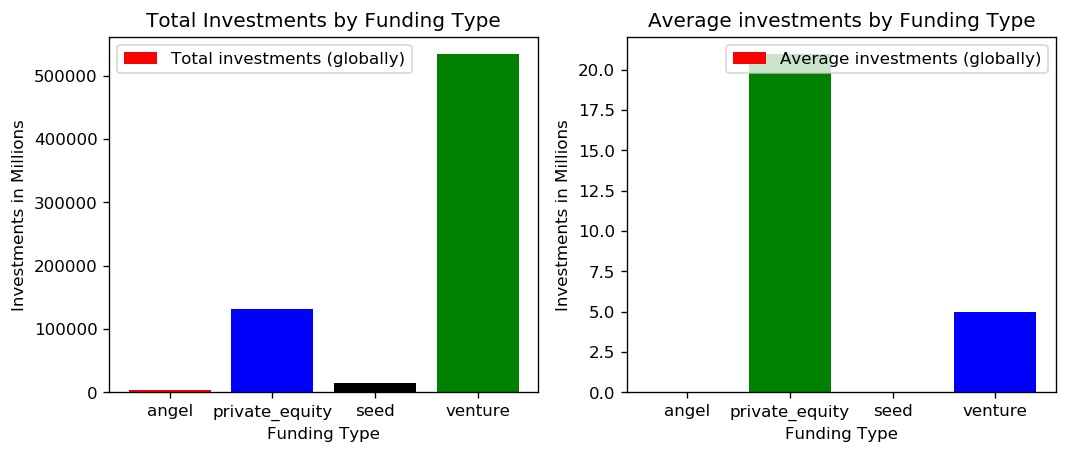

In [649]:
plt.figure(figsize=[9.0,7.0],dpi=120,edgecolor='b',frameon=True)

## https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

plt.subplot(2,2,1)
plt.bar(x_axis, total_invest, label= "Total investments (globally)",color=['red', 'blue', 'black', 'green'])


plt.legend()
plt.title('Total Investments by Funding Type')
plt.xlabel('Funding Type')
plt.ylabel('Investments in Millions')

#plt.bar(x_axis,average_invest,color= '#444444', label= "Average investments (globally)")

plt.tight_layout()

plt.subplot(2,2,2)

plt.bar(x_axis,average_invest, label= "Average investments (globally)",color=['red', 'green', 'black', 'blue'])

plt.legend()
plt.title('Average investments by Funding Type')
plt.xlabel('Funding Type')
plt.ylabel('Investments in Millions')

plt.tight_layout()




In [650]:
## This is just for Testing 

df = master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                      (master_frame['funding_round_type'] == 'venture') |
                      (master_frame['funding_round_type'] == 'seed') |
                      (master_frame['funding_round_type'] == 'private_equity')]

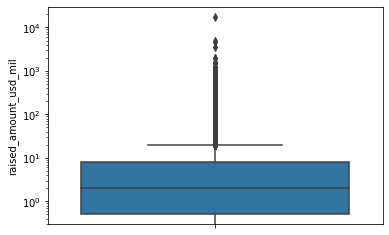

In [651]:
## This is just for Testing 

sns.boxplot(y= 'raised_amount_usd_mil', data=df)
plt.yscale('log')
plt.show()



## the below mwntioned boxplot clearly shows the outliers 
### getting refrence from Live session


In [652]:
## summary matrics 

df['raised_amount_usd_mil'].describe()

## as check there is huge defrence in mean and median 

count    70494.000000
mean         9.721814
std         80.247651
min          0.000000
25%          0.500000
50%          2.000000
75%          8.000000
max      17600.000000
Name: raised_amount_usd_mil, dtype: float64

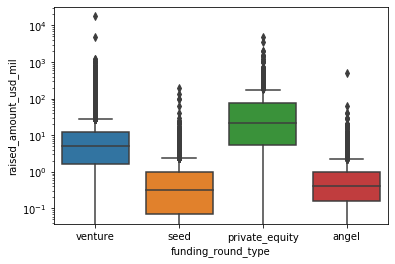

In [653]:
## compair summary matrics of all four categories 

sns.boxplot(x='funding_round_type', y='raised_amount_usd_mil', data=df)
plt.yscale('log') 
plt.show()


In [654]:
## plt.bar(x_axis,average_invest, label= "Average investments (globally)",color=['red', 'green', 'black', 'blue'])
## 
## plt.legend()
## plt.title('Average investments by Funding Type')
## plt.xlabel('Funding Type')
## plt.ylabel('Investments in Millions')
## 
## plt.tight_layout()

### Plot 2:

In [655]:
top9 = top9[~(top9.country_code == 'CHN')]

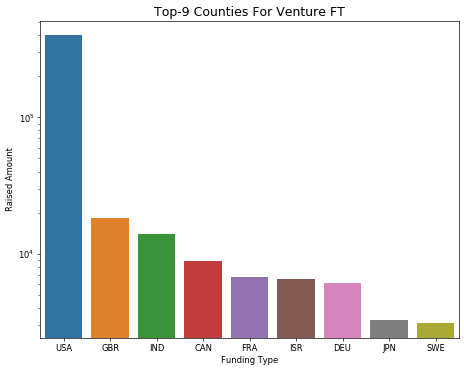

In [656]:
plt.figure(figsize=[9.0,7.0],dpi=60,edgecolor='b',frameon=True)
#sns.barplot(x=top9['country_code'],y=top9['raised_amount_usd_mil'])

#sns.barplot(x='country_code',y= 'raised_amount_usd_mil',data=top9)


sns.barplot(x= 'country_code', y='raised_amount_usd_mil', data=top9)
plt.yscale('log')
plt.xlabel('Funding Type')
plt.ylabel('Raised Amount')
plt.title('Top-9 Counties For Venture FT',fontsize =15)

#plt.tight_layout()
plt.show()

### Plot 3

In [657]:
Total_count_USA = master_funding_type_range[(master_funding_type_range.country_code == 'USA')]

In [658]:
Total_count_GBR = master_funding_type_range[(master_funding_type_range.country_code == 'GBR')]

In [659]:
Total_count_IND = master_funding_type_range[(master_funding_type_range.country_code == 'IND')]

In [660]:
Top_1 = pd.DataFrame(Total_count_USA.groupby('main_sector')['main_sector'].count().rename('Total_Invest_Count').sort_values(ascending = False).nlargest(3))

Top_1['Top_Country'] = 'USA'

Top_1.reset_index(inplace=True)

In [642]:
Top_2 = pd.DataFrame(Total_count_GBR.groupby('main_sector')['main_sector'].count().rename('Total_Invest_Count').sort_values(ascending = False).nlargest(3))

Top_2['Top_Country'] = 'GBR'

Top_2.reset_index(inplace=True)

In [643]:
Top_3 = pd.DataFrame(Total_count_IND.groupby('main_sector')['main_sector'].count().rename('Total_Invest_Count').sort_values(ascending = False).nlargest(3))

Top_3['Top_Country'] = 'IND'

Top_3.reset_index(inplace=True)

Top_3

,main_sector,Total_Invest_Count,Top_Country
0,Others,103,IND
1,"Social, Finance, Analytics, Advertising",59,IND
2,"News, Search and Messaging",49,IND


In [644]:
Top_3_sector = pd.merge(pd.merge(Top_1,Top_2, how= 'outer'),Top_3,how='outer')



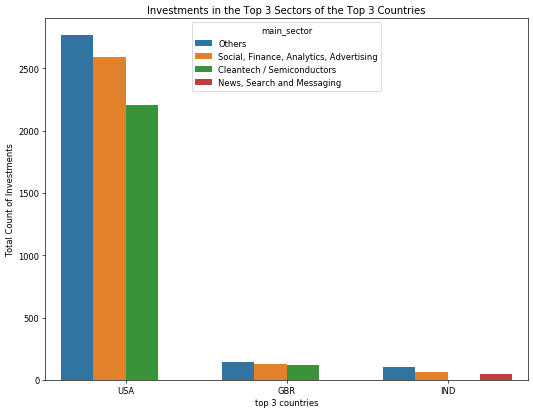

In [645]:
#Size 
plt.figure(figsize=[9.0,7.0],dpi=60,edgecolor='b',frameon=True)

sns.barplot(x= 'Top_Country', y='Total_Invest_Count', hue='main_sector', data=Top_3_sector)

plt.ylabel("Total Count of Investments")
plt.xlabel("top 3 countries")
plt.title("Investments in the Top 3 Sectors of the Top 3 Countries") 

plt.tight_layout()
plt.show()